In [2]:
#imports
import pandas as pd
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import StandardScaler

In [3]:
#read in data
drought = pd.read_csv('data/final_drought_temp_data.csv')

#### David's Code

In [4]:
drought['climate_regions']=drought['Name']

In [5]:
oh='Ohio Valley'
ohio_valley=dict.fromkeys(['Illinois','Indiana','Kentucky','Missouri',
             'Ohio','Tennessee','West Virginia'],oh)
#https://stackoverflow.com/questions/11977730/creating-a-dictionary-with-same-values

In [6]:
oh_list=['Illinois','Indiana','Kentucky','Missouri',
             'Ohio','Tennessee','West Virginia']

In [7]:
def state_region_dict(list_states,string_region):
    return dict.fromkeys(list_states,string_region)
#function to combine states and region into dictionary


In [8]:
um_list=['Iowa', 'Michigan', 'Minnesota', 'Wisconsin']
um_region='Upper Midwest'
upper_midwest=state_region_dict(um_list,um_region)


In [9]:
ne_list=['Connecticut','Delaware','Maine','Maryland','Massachusetts', 'New Hampshire', 'New Jersey',
        'New York', 'Pennsylvania','Rhode Island','Vermont']
ne_region='Northeast'
north_east=state_region_dict(ne_list,ne_region)

In [10]:
nw_list=['Idaho','Oregon','Washington']
nw_region='Northwest'
north_west=state_region_dict(nw_list,nw_region)

s_list=['Arkansas','Kansas','Louisiana','Mississippi','Oklahoma','Texas']
s_region='South'
south=state_region_dict(s_list,s_region)

se_list=['Alabama','Florida','Georgia','North Carolina','South Carolina','Virginia']
se_region='Southeast'
south_east=state_region_dict(se_list,se_region)

sw_list=['Arizona','Colorado','New Mexico','Utah']
sw_region='Southwest'
south_west=state_region_dict(sw_list,sw_region)

w_list=['California','Nevada']
w_region='West'
west=state_region_dict(w_list,w_region)

wnc_list=['Montana','Nebraska','North Dakota','South Dakota','Wyoming']
wnc_region='Northern Rockies and Plains'
northern_rockies=state_region_dict(wnc_list,wnc_region)

In [11]:
final_dict={**ohio_valley,**upper_midwest,**north_east,**north_west,**south,
            **south_east,**south_west,**west,**northern_rockies}
#combine multiple dictionaries into one
#https://towardsdatascience.com/merge-dictionaries-in-python-d4e9ce137374

In [12]:
drought['climate_regions']=drought['Name']

In [13]:
#Replaced initial values with dictionary region values
drought.replace({'climate_regions':final_dict},inplace=True)
#https://sparkbyexamples.com/pandas/pandas-remap-values-in-column-with-a-dictionary-dict/

In [14]:
drought['ValidEnd'] = pd.to_datetime(drought['ValidEnd'])

In [15]:
drought = drought[drought['ValidEnd']<'2021-01-01']

In [16]:
ohio_valley = drought[drought['climate_regions'] == 'Ohio Valley']

In [17]:
west = drought[drought['climate_regions'] == 'West']

In [18]:
up_mid = drought[drought['climate_regions'] == 'Upper Midwest']

In [19]:
nrp = drought[drought['climate_regions'] == 'Northern Rockies and Plains']

In [20]:
ne = drought[drought['climate_regions'] == 'Northeast']

In [21]:
nw = drought[drought['climate_regions'] == 'Northwest']

In [22]:
south = drought[drought['climate_regions'] == 'South']

In [23]:
sw = drought[drought['climate_regions'] == 'Southwest']

In [24]:
se = sw = drought[drought['climate_regions'] == 'Southeast']

In [25]:
ohio_valley

,ValidEnd,Name,state,area_none,area_d0,area_d1,area_d2,area_d3,area_d4,population_none,...,population_d3,population_d4,DSCI,total_area,total_population,avg_tmax,avg_tmin,total_avg_prcp_inches,total_avg_prcp_mm,climate_regions
10451,2020-12-28,Illinois,IL,33454.57,15550.66,6236.48,1140.83,0.0,0.0,8875219.25,...,0.0,0.0,56,56382.54,12847389.79,38.465714,17.117143,0.108000,2.743200,Ohio Valley
10452,2020-12-21,Illinois,IL,33454.57,15550.66,6236.48,1140.83,0.0,0.0,8875219.25,...,0.0,0.0,56,56382.54,12847389.79,39.528571,26.411429,0.006000,0.152400,Ohio Valley
10453,2020-12-14,Illinois,IL,32814.14,16191.10,6236.48,1140.83,0.0,0.0,8839298.46,...,0.0,0.0,57,56382.55,12847389.79,44.220000,29.057143,1.026000,26.060400,Ohio Valley
10454,2020-12-07,Illinois,IL,32794.13,18023.24,4619.65,945.53,0.0,0.0,8650968.46,...,0.0,0.0,53,56382.55,12847389.80,43.485714,24.954286,0.000000,0.000000,Ohio Valley
10455,2020-11-30,Illinois,IL,28067.62,21244.44,6124.95,945.53,0.0,0.0,8375517.01,...,0.0,0.0,64,56382.54,12847389.80,46.328571,32.782857,1.082000,27.482800,Ohio Valley
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45975,2001-01-29,West Virginia,WV,3547.74,19253.58,1403.34,0.00,0.0,0.0,261876.40,...,0.0,0.0,91,24204.66,1852994.01,40.380952,19.880952,0.223333,5.672667,Ohio Valley
45976,2001-01-22,West Virginia,WV,5496.60,14287.99,3143.43,1276.64,0.0,0.0,443651.89,...,0.0,0.0,101,24204.66,1852994.00,35.142857,23.095238,1.165000,29.591000,Ohio Valley
45977,2001-01-15,West Virginia,WV,7763.39,12021.20,3143.44,1276.64,0.0,0.0,664684.83,...,0.0,0.0,91,24204.67,1852994.00,43.904762,24.714286,0.008333,0.211667,Ohio Valley
45978,2001-01-08,West Virginia,WV,7763.16,12391.29,3670.41,379.81,0.0,0.0,664647.42,...,0.0,0.0,86,24204.67,1852993.99,33.119048,21.452381,0.055000,1.397000,Ohio Valley


#### Julio's Code

In [26]:
#julio's code
west=west.groupby('ValidEnd').agg({'area_none':'sum','area_d0':'sum','area_d1':'sum','area_d2':'sum','area_d3':'sum','area_d4':'sum',
                                                  'population_none':'sum','population_d0':'sum','population_d1':'sum','population_d2':'sum','population_d3':'sum',
                                                  'population_d4':'sum','DSCI':'mean','total_population':'sum','total_area':'sum', 'avg_tmax': 'mean', 'avg_tmin': 'mean', 'total_avg_prcp_inches':'sum', 'total_avg_prcp_mm': 'sum'})

In [27]:
west

,area_none,area_d0,area_d1,area_d2,area_d3,area_d4,population_none,population_d0,population_d1,population_d2,population_d3,population_d4,DSCI,total_population,total_area,avg_tmax,avg_tmin,total_avg_prcp_inches,total_avg_prcp_mm
ValidEnd,,,,,,,,,,,,,,,,,,,
2001-01-01,268682.71,0.00,0.00,0.00,0.00,0.00,39954507.39,0.00,0.00,0.00,0.00,0.00,0.0,39954507.39,268682.71,55.340909,25.125000,0.000000,0.000000
2001-01-08,219867.53,48815.18,0.00,0.00,0.00,0.00,19148835.12,20805672.27,0.00,0.00,0.00,0.00,15.5,39954507.39,268682.71,56.907792,26.157468,0.573636,14.570364
2001-01-15,183369.34,85313.37,0.00,0.00,0.00,0.00,19147061.90,20807445.49,0.00,0.00,0.00,0.00,29.5,39954507.39,268682.71,45.813312,28.798701,1.895909,48.156091
2001-01-22,229132.27,39550.44,0.00,0.00,0.00,0.00,38419211.81,1535295.58,0.00,0.00,0.00,0.00,15.0,39954507.39,268682.71,47.125649,23.713312,0.072500,1.841500
2001-01-29,193653.20,75029.51,0.00,0.00,0.00,0.00,38179628.97,1774878.42,0.00,0.00,0.00,0.00,28.5,39954507.39,268682.71,46.303571,27.376623,1.511818,38.400182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-30,5542.04,34654.88,60303.12,60478.93,88304.37,19399.37,5547783.11,14970129.93,5063039.47,10253169.73,2805310.34,1315074.81,304.5,39954507.39,268682.71,56.321537,27.510931,0.078106,1.983894
2020-12-07,5473.73,34723.19,60303.12,60312.51,84406.25,23463.92,5523003.27,14994909.77,5063039.47,10252697.32,2798285.43,1322572.14,306.5,39954507.40,268682.72,57.441558,25.848864,0.075455,1.916545
2020-12-14,0.00,7958.10,54374.95,93821.89,89063.85,23463.92,0.00,6801658.18,16499875.50,12485483.68,2844917.89,1322572.14,333.0,39954507.39,268682.71,52.524567,28.696212,0.907500,23.050500


#### Son's Code

In [ ]:
#imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import * 
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model


In [28]:
#plotting Drought history
def plot_dsci(region, name):
    region['DSCI'].plot(figsize = (10, 8))
    plt.xlabel("Year")
    plt.ylabel("DSCI (Severity Level)")
    plt.title(f'{name} Region Drought Severity 2001-2020')
    plt.savefig('fig.png')

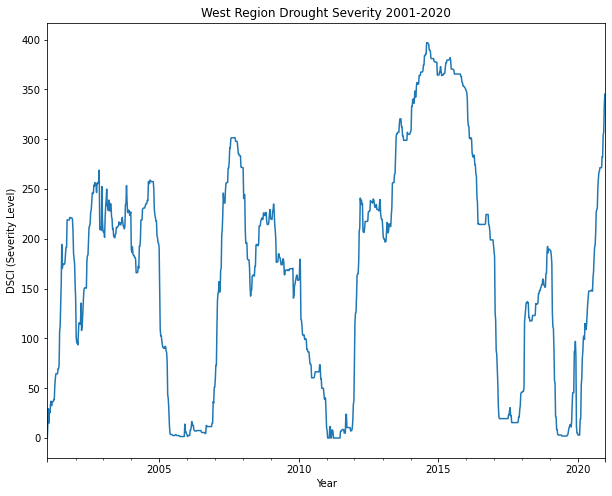

In [29]:
#looking at west drought severity
plot_dsci(west, 'West')

In [30]:
#creating function to create window size and DF input. window size or kernal size 
#is used by NN to make predictions on next iteration.
# Code modified from Greg Hogg https://www.youtube.com/watch?v=kGdbPnMCdOg
def df_to_X_y(df, windowsize=5):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-windowsize):
        row = [[a] for a in df_as_np[i:i+5]]
        X.append(row)
        label = df_as_np[i+5]
        y.append(label)
    return np.array(X), np.array(y)

In [31]:
WINDOW_SIZE = 5
X, y = df_to_X_y(west['DSCI'], WINDOW_SIZE)
X.shape, y.shape

((1039, 5, 1), (1039,))

In [32]:
#Creating training, val, and test set as shown By Hogg. https://www.youtube.com/watch?v=kGdbPnMCdOg
X_train, y_train = X[:750], y[:750]
X_val, y_val = X[750:850], y[750:850]
X_test, y_test = X[850:], y[850:]

In [33]:
model1 = Sequential()
model1.add(InputLayer((5,1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                16896     
_________________________________________________________________
dense (Dense)                (None, 8)                 520       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [34]:
#Model checkpoint, saving best model. 
#Loss function is measured on MSE and metrics used is RMSE
cp = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer = Adam(learning_rate=0.005), metrics=[RootMeanSquaredError()])

In [35]:
#Saving history to view loss
history = (model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp]))

Epoch 1/10
24/24 [==============================] - 8s 92ms/step - loss: 42498.3711 - root_mean_squared_error: 206.1513 - val_loss: 67200.1016 - val_root_mean_squared_error: 259.2298


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 2/10
24/24 [==============================] - 1s 21ms/step - loss: 36234.9883 - root_mean_squared_error: 190.3549 - val_loss: 55040.3008 - val_root_mean_squared_error: 234.6067


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 3/10
24/24 [==============================] - 0s 20ms/step - loss: 28163.0938 - root_mean_squared_error: 167.8186 - val_loss: 42911.2266 - val_root_mean_squared_error: 207.1503


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 4/10
24/24 [==============================] - 0s 18ms/step - loss: 19985.0566 - root_mean_squared_error: 141.3685 - val_loss: 30697.8242 - val_root_mean_squared_error: 175.2079


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 5/10
24/24 [==============================] - 0s 21ms/step - loss: 12638.1270 - root_mean_squared_error: 112.4194 - val_loss: 20123.8184 - val_root_mean_squared_error: 141.8584


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 6/10
24/24 [==============================] - 1s 27ms/step - loss: 7300.5332 - root_mean_squared_error: 85.4432 - val_loss: 12593.8525 - val_root_mean_squared_error: 112.2223


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 7/10
24/24 [==============================] - 0s 17ms/step - loss: 4304.1914 - root_mean_squared_error: 65.6063 - val_loss: 7942.3545 - val_root_mean_squared_error: 89.1199


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 8/10
24/24 [==============================] - 0s 17ms/step - loss: 2667.7717 - root_mean_squared_error: 51.6505 - val_loss: 5295.0117 - val_root_mean_squared_error: 72.7668


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 9/10
24/24 [==============================] - 1s 34ms/step - loss: 1770.9662 - root_mean_squared_error: 42.0828 - val_loss: 3436.5889 - val_root_mean_squared_error: 58.6224


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 10/10
24/24 [==============================] - 0s 8ms/step - loss: 1216.6454 - root_mean_squared_error: 34.8804 - val_loss: 2282.7512 - val_root_mean_squared_error: 47.7781


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


In [36]:
#Creating DF for loss history
history_df = pd.DataFrame(history.history)
history_df

,loss,root_mean_squared_error,val_loss,val_root_mean_squared_error
0,42498.371094,206.151337,67200.101562,259.229828
1,36234.988281,190.354904,55040.300781,234.606689
2,28163.093750,167.818634,42911.226562,207.150253
3,19985.056641,141.368515,30697.824219,175.207947
4,12638.126953,112.419426,20123.818359,141.858444
5,7300.533203,85.443161,12593.852539,112.222336
6,4304.191406,65.606339,7942.354492,89.119888
7,2667.771729,51.650478,5295.011719,72.766830
8,1770.966187,42.082848,3436.588867,58.622425
9,1216.645386,34.880444,2282.751221,47.778145


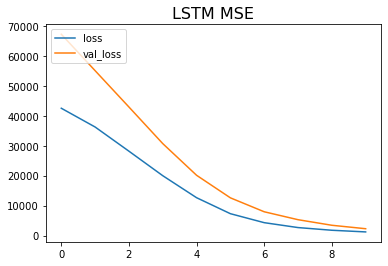

In [37]:
#plotting loss
history_df.filter(like='loss').plot()
plt.title("LSTM MSE", fontsize=16)
plt.legend(loc='upper left')
plt.savefig('fig2.png')

In [38]:
#loading in best model from memory.
model1 = load_model("model1/")

In [39]:
#Predictions
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals': y_train})
train_results

,Train Predictions,Actuals
0,23.394289,25.5
1,30.314129,34.0
2,44.168831,37.0
3,46.709217,32.5
4,34.624741,36.0
...,...,...
745,278.894440,379.5
746,278.894470,380.0
747,278.894623,380.5
748,278.894836,382.0


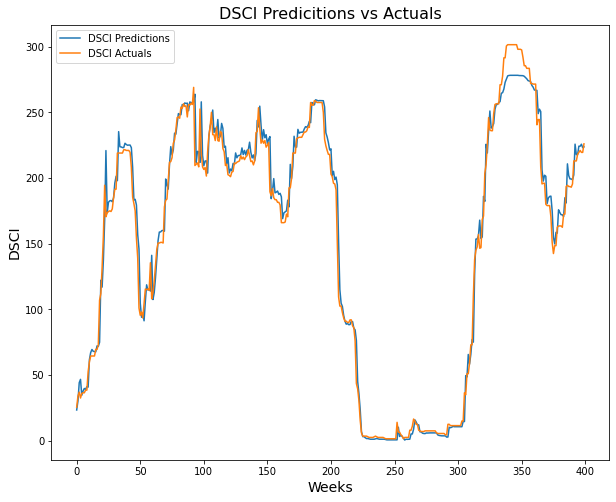

In [40]:
#plot pred vs actuals
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))
plt.plot(train_results['Train Predictions'][:400], label = 'DSCI Predictions')
plt.plot(train_results['Actuals'][:400], label = "DSCI Actuals")
plt.xlabel("Weeks", fontsize=14)
plt.ylabel("DSCI", fontsize=14)
plt.title("DSCI Predicitions vs Actuals", fontsize=16)
plt.legend(loc='upper left')
plt.savefig('fig1.png')

In [41]:
#Validation set results
val_predictions = model1.predict(X_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals': y_val})
val_results

,Val Predictions,Actuals
0,278.894043,370.5
1,278.889862,370.5
2,278.889801,370.5
3,278.889801,370.5
4,278.889801,370.0
...,...,...
95,20.821264,19.5
96,20.821262,19.5
97,20.821262,19.5
98,20.821262,19.5


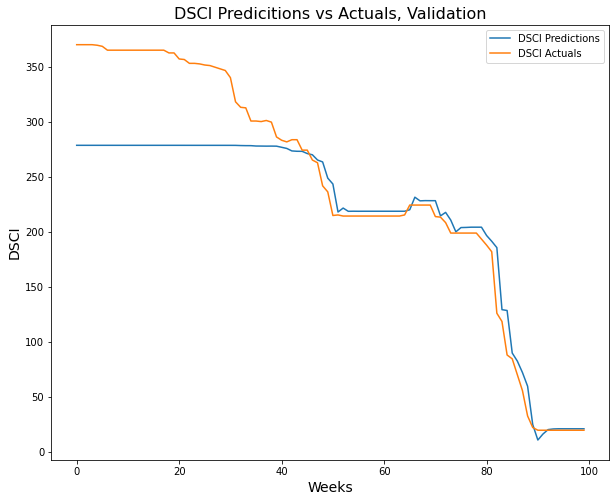

In [42]:
#plot validation set 
plt.figure(figsize = (10,8))
plt.plot(val_results['Val Predictions'], label = 'DSCI Predictions')
plt.plot(val_results['Actuals'], label = 'DSCI Actuals')
plt.xlabel("Weeks", fontsize=14)
plt.ylabel("DSCI", fontsize=14)
plt.title("DSCI Predicitions vs Actuals, Validation", fontsize=16)
plt.legend()
plt.savefig('fig3.png')

In [43]:
test_predictions = model1.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':val_predictions, 'Actuals': y_val})
test_results

,Test Predictions,Actuals
0,278.894043,370.5
1,278.889862,370.5
2,278.889801,370.5
3,278.889801,370.5
4,278.889801,370.0
...,...,...
95,20.821264,19.5
96,20.821262,19.5
97,20.821262,19.5
98,20.821262,19.5


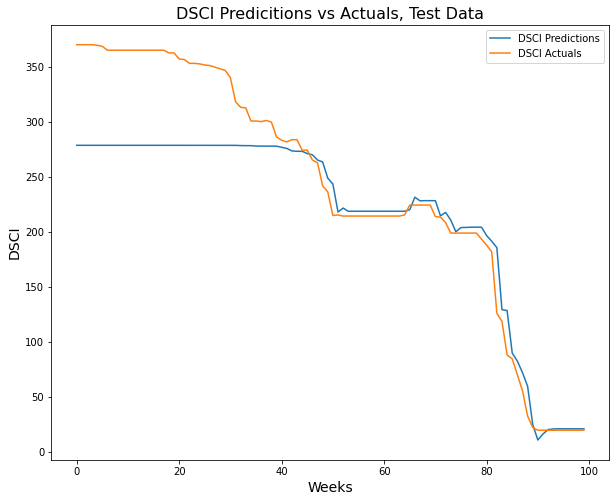

In [44]:
plt.figure(figsize = (10,8))
plt.plot(test_results['Test Predictions'], label = 'DSCI Predictions')
plt.plot(test_results['Actuals'], label = 'DSCI Actuals')
plt.xlabel("Weeks", fontsize=14)
plt.ylabel("DSCI", fontsize=14)
plt.title("DSCI Predicitions vs Actuals, Test Data", fontsize=16)
plt.legend()
plt.savefig('fig4.png')

In [45]:
#plotting predictions 
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(fignum, model, X, y, start = 0, end=100):
    predictions = model.predict(X).flatten()
    df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
    plt.figure(figsize = (10,8))
    plt.plot(df['Predictions'][start:end], label = 'DSCI Predictions')
    plt.plot(df['Actuals'][start:end], label = 'DSCI Actuals' )
    plt.xlabel("Weeks", fontsize=14)
    plt.ylabel("DSCI", fontsize=14)
    plt.title("DSCI Predicitions vs Actuals", fontsize=16)
    plt.legend()
    plt.savefig(f'fig{str(fignum)}.png')
    return df, mse(y, predictions)

(     Predictions  Actuals
 0      20.821264     19.5
 1      20.821264     19.5
 2      20.821264     19.5
 3      20.821264     19.5
 4      20.821264     19.5
 ..           ...      ...
 184   270.851105    304.5
 185   277.211487    306.5
 186   278.228821    333.0
 187   278.793274    345.5
 188   278.852203    345.5
 
 [189 rows x 2 columns],
 224.4549631978381)

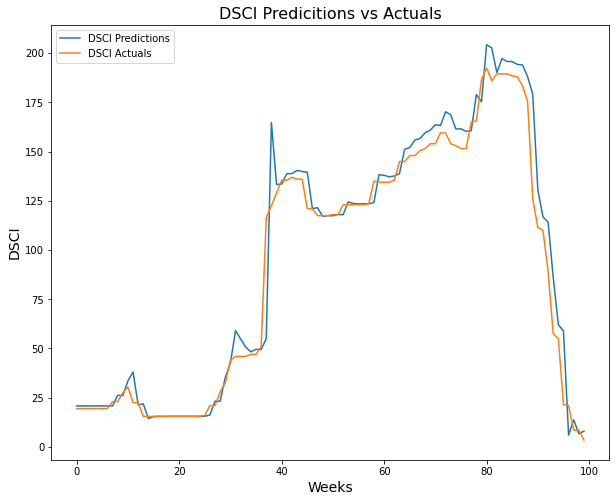

In [46]:
plot_predictions1(5, model1, X_test, y_test)

In [47]:
model2 = Sequential()
model2.add(InputLayer((5,1)))
model2.add(Conv1D(64, kernel_size=2))
model2.add(Flatten())
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))
model2.summary()

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 4, 64)             192       
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 2056      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 2,257
Trainable params: 2,257
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 4, 64)             192       
______________________________

In [48]:
cp2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer = Adam(learning_rate=0.005), metrics=[RootMeanSquaredError()])

In [49]:
history = (model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp2]))

Epoch 1/10
24/24 [==============================] - 1s 14ms/step - loss: 5923.4785 - root_mean_squared_error: 76.9641 - val_loss: 509.6864 - val_root_mean_squared_error: 22.5762
INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


Epoch 2/10
24/24 [==============================] - 0s 3ms/step - loss: 539.1119 - root_mean_squared_error: 23.2188 - val_loss: 451.6263 - val_root_mean_squared_error: 21.2515
INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


Epoch 3/10
24/24 [==============================] - 0s 6ms/step - loss: 298.6753 - root_mean_squared_error: 17.2822 - val_loss: 447.9531 - val_root_mean_squared_error: 21.1649
INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


Epoch 4/10
24/24 [==============================] - 0s 14ms/step - loss: 264.2693 - root_mean_squared_error: 16.2564 - val_loss: 348.8067 - val_root_mean_squared_error: 18.6764
INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


Epoch 5/10
24/24 [==============================] - 0s 10ms/step - loss: 255.2632 - root_mean_squared_error: 15.9770 - val_loss: 348.7090 - val_root_mean_squared_error: 18.6738
INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


Epoch 6/10
24/24 [==============================] - 0s 14ms/step - loss: 244.5317 - root_mean_squared_error: 15.6375 - val_loss: 329.3972 - val_root_mean_squared_error: 18.1493
INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


Epoch 7/10
24/24 [==============================] - 0s 9ms/step - loss: 231.0008 - root_mean_squared_error: 15.1987 - val_loss: 330.7616 - val_root_mean_squared_error: 18.1869
Epoch 8/10
24/24 [==============================] - 0s 10ms/step - loss: 221.1573 - root_mean_squared_error: 14.8714 - val_loss: 289.0778 - val_root_mean_squared_error: 17.0023
INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


Epoch 9/10
24/24 [==============================] - 0s 19ms/step - loss: 210.9894 - root_mean_squared_error: 14.5255 - val_loss: 233.7629 - val_root_mean_squared_error: 15.2893
INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


Epoch 10/10
24/24 [==============================] - 0s 18ms/step - loss: 197.4850 - root_mean_squared_error: 14.0529 - val_loss: 266.8623 - val_root_mean_squared_error: 16.3359


In [50]:
history_df = pd.DataFrame(history.history)
history_df

,loss,root_mean_squared_error,val_loss,val_root_mean_squared_error
0,5923.478516,76.964134,509.686371,22.576235
1,539.111938,23.218784,451.626343,21.251503
2,298.675262,17.282225,447.953125,21.164904
3,264.269257,16.256361,348.806671,18.676367
4,255.263153,15.976957,348.708984,18.673752
5,244.531693,15.637509,329.397217,18.149303
6,231.000778,15.198709,330.761566,18.186852
7,221.157272,14.871358,289.077759,17.002287
8,210.989380,14.525474,233.762909,15.289307
9,197.485016,14.052937,266.862335,16.335922


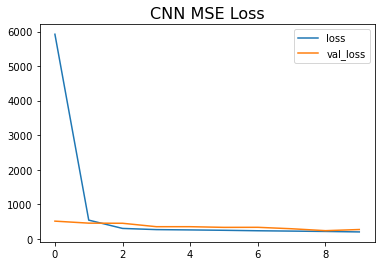

In [51]:
history_df.filter(like='loss').plot();
plt.title("CNN MSE Loss", fontsize=16)
plt.savefig('fig6.png')

(     Predictions  Actuals
 0      19.932066     19.5
 1      19.932066     19.5
 2      19.932066     19.5
 3      19.932066     19.5
 4      19.932066     19.5
 ..           ...      ...
 184   279.433167    304.5
 185   289.277191    306.5
 186   296.941193    333.0
 187   312.347992    345.5
 188   326.116089    345.5
 
 [189 rows x 2 columns],
 337.2203922951545)

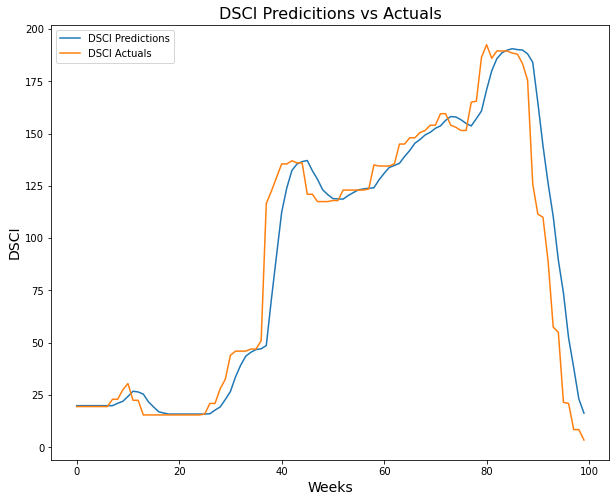

In [52]:
plot_predictions1('cnn', model2, X_test, y_test)

In [53]:
model3 = Sequential()
model3.add(InputLayer((5,1)))
model3.add(GRU(64))
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 64)                12864     
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 13,393
Trainable params: 13,393
Non-trainable params: 0
_________________________________________________________________


In [54]:
cp3 = ModelCheckpoint('model3/', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer = Adam(learning_rate=0.005), metrics=[RootMeanSquaredError()])

In [55]:
history = (model3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp3]))

Epoch 1/10
24/24 [==============================] - 11s 91ms/step - loss: 41545.7695 - root_mean_squared_error: 203.8278 - val_loss: 64578.2656 - val_root_mean_squared_error: 254.1225


INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


Epoch 2/10
24/24 [==============================] - 1s 27ms/step - loss: 35556.0000 - root_mean_squared_error: 188.5630 - val_loss: 53766.4453 - val_root_mean_squared_error: 231.8759


INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


Epoch 3/10
24/24 [==============================] - 1s 22ms/step - loss: 26708.0742 - root_mean_squared_error: 163.4261 - val_loss: 39489.6406 - val_root_mean_squared_error: 198.7200


INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


Epoch 4/10
24/24 [==============================] - 0s 16ms/step - loss: 17028.1074 - root_mean_squared_error: 130.4918 - val_loss: 25162.1699 - val_root_mean_squared_error: 158.6259


INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


Epoch 5/10
24/24 [==============================] - 1s 22ms/step - loss: 9261.6904 - root_mean_squared_error: 96.2377 - val_loss: 14232.9727 - val_root_mean_squared_error: 119.3020


INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


Epoch 6/10
24/24 [==============================] - 1s 28ms/step - loss: 4713.4619 - root_mean_squared_error: 68.6547 - val_loss: 8099.2920 - val_root_mean_squared_error: 89.9961


INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


Epoch 7/10
24/24 [==============================] - 0s 17ms/step - loss: 2648.2866 - root_mean_squared_error: 51.4615 - val_loss: 5237.0171 - val_root_mean_squared_error: 72.3672


INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


Epoch 8/10
24/24 [==============================] - 0s 19ms/step - loss: 1690.8427 - root_mean_squared_error: 41.1199 - val_loss: 3115.5237 - val_root_mean_squared_error: 55.8169


INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


Epoch 9/10
24/24 [==============================] - 1s 22ms/step - loss: 1095.3723 - root_mean_squared_error: 33.0964 - val_loss: 1972.2874 - val_root_mean_squared_error: 44.4104


INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


Epoch 10/10
24/24 [==============================] - 1s 22ms/step - loss: 726.4574 - root_mean_squared_error: 26.9529 - val_loss: 1247.9618 - val_root_mean_squared_error: 35.3265


INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


(     Predictions  Actuals
 0      16.627172     19.5
 1      16.627172     19.5
 2      16.627172     19.5
 3      16.627172     19.5
 4      16.627172     19.5
 ..           ...      ...
 184   280.027954    304.5
 185   295.749573    306.5
 186   297.138458    333.0
 187   300.435699    345.5
 188   300.717133    345.5
 
 [189 rows x 2 columns],
 187.41685082661579)

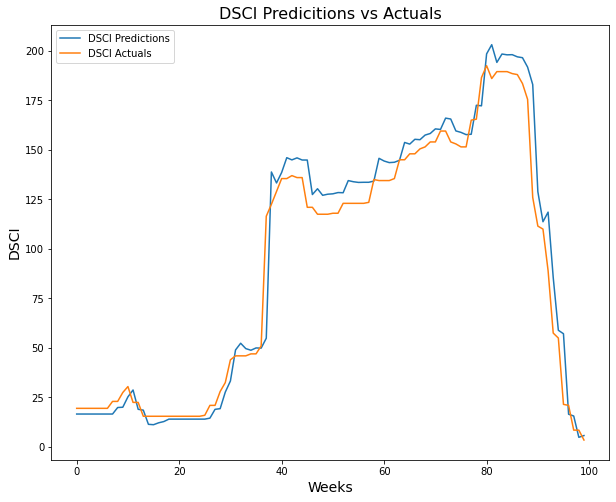

In [56]:
plot_predictions1(7, model3, X_test, y_test)

In [57]:
history_df = pd.DataFrame(history.history)
history_df

,loss,root_mean_squared_error,val_loss,val_root_mean_squared_error
0,41545.769531,203.827789,64578.265625,254.122543
1,35556.000000,188.562988,53766.445312,231.875931
2,26708.074219,163.426056,39489.640625,198.720001
3,17028.107422,130.491791,25162.169922,158.625885
4,9261.690430,96.237679,14232.972656,119.302025
5,4713.461914,68.654655,8099.291992,89.996063
6,2648.286621,51.461506,5237.017090,72.367241
7,1690.842651,41.119858,3115.523682,55.816875
8,1095.372314,33.096409,1972.287354,44.410442
9,726.457397,26.952873,1247.961792,35.326504


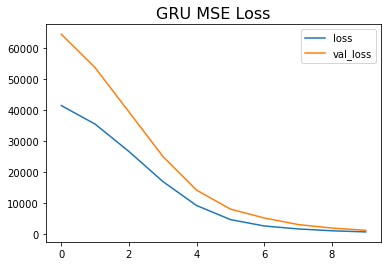

In [58]:
history_df.filter(like='loss').plot();
plt.title("GRU MSE Loss", fontsize=16)
plt.savefig('fig8.png')

In [59]:
dsci_df = pd.DataFrame({'DSCI':west['DSCI']})
dsci_df['Seconds']=dsci_df.index.map(pd.Timestamp.timestamp)

day = 60*60*24
year = 365.2425*day
dsci_df['year sin'] = np.sin(dsci_df['Seconds'] * (2*np.pi/year))
dsci_df['year cos'] = np.cos(dsci_df['Seconds'] * (2*np.pi/year))
dsci_df

,DSCI,Seconds,year sin,year cos
ValidEnd,,,,
2001-01-01,0.0,9.783072e+08,0.008300,0.999966
2001-01-08,15.5,9.789120e+08,0.128365,0.991727
2001-01-15,29.5,9.795168e+08,0.246570,0.969125
2001-01-22,15.0,9.801216e+08,0.361204,0.932487
2001-01-29,28.5,9.807264e+08,0.470607,0.882343
...,...,...,...,...
2020-11-30,304.5,1.606694e+09,-0.513800,0.857910
2020-12-07,306.5,1.607299e+09,-0.407020,0.913419
2020-12-14,333.0,1.607904e+09,-0.294344,0.955699


In [60]:
dsci_df.drop('Seconds', axis=1, inplace=True)

In [61]:
def df_to_X_y2(df, windowsize=6):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-windowsize):
        row = [r for r in df_as_np[i:i+windowsize]]
        X.append(row)
        label = df_as_np[i+5][0]
        y.append(label)
    return np.array(X), np.array(y)

In [62]:
X2, y2 = df_to_X_y2(dsci_df)
X2.shape, y2.shape

((1038, 6, 3), (1038,))

In [63]:
X2_train, y2_train = X2[:750], y2[:750]
X2_val, y2_val = X2[750:850], y2[750:850]
X2_test, y2_test = X2[850:], y2[850:]

In [64]:
dsci_training_mean = np.mean(X2_train[:, :, 0])
temp_training_sd = np.std(X2_train[:, :, 0])

def preprocess(X):
    X[:, :, 0] = (X[:, :, 0] - dsci_training_mean/temp_training_sd)
    return X


In [65]:
preprocess(X2_train)
preprocess(X2_val)
preprocess(X2_test)

array([[[ 1.79446130e+01,  9.65598082e-01, -2.60039120e-01],
        [ 1.79446130e+01,  9.27367405e-01, -3.74151970e-01],
        [ 1.79446130e+01,  8.75705362e-01, -4.82845853e-01],
        [ 1.79446130e+01,  8.11360193e-01, -5.84546523e-01],
        [ 1.79446130e+01,  7.35263828e-01, -6.77781014e-01],
        [ 1.79446130e+01,  6.48518397e-01, -7.61198981e-01]],

       [[ 1.79446130e+01,  9.27367405e-01, -3.74151970e-01],
        [ 1.79446130e+01,  8.75705362e-01, -4.82845853e-01],
        [ 1.79446130e+01,  8.11360193e-01, -5.84546523e-01],
        [ 1.79446130e+01,  7.35263828e-01, -6.77781014e-01],
        [ 1.79446130e+01,  6.48518397e-01, -7.61198981e-01],
        [ 1.79446130e+01,  5.52380262e-01, -8.33592254e-01]],

       [[ 1.79446130e+01,  8.75705362e-01, -4.82845853e-01],
        [ 1.79446130e+01,  8.11360193e-01, -5.84546523e-01],
        [ 1.79446130e+01,  7.35263828e-01, -6.77781014e-01],
        [ 1.79446130e+01,  6.48518397e-01, -7.61198981e-01],
        [ 1.79446130

In [66]:
model4 = Sequential()
model4.add(InputLayer((5,3)))
model4.add(LSTM(64))
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'linear'))
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 64)                17408     
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 17,937
Trainable params: 17,937
Non-trainable params: 0
_________________________________________________________________


In [67]:
cp4 = ModelCheckpoint('model4/', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer = Adam(learning_rate=0.005), metrics=[RootMeanSquaredError()])

In [68]:
history = (model4.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=10, callbacks=[cp4]))

Epoch 1/10


24/24 [==============================] - ETA: 0s - loss: 40755.9531 - root_mean_squared_error: 201.8810WARNING:tensorflow:Model was constructed with shape (None, 5, 3) for input KerasTensor(type_spec=TensorSpec(shape=(None, 5, 3), dtype=tf.float32, name='input_4'), name='input_4', description="created by layer 'input_4'"), but it was called on an input with incompatible shape (None, 6, 3).


24/24 [==============================] - 4s 50ms/step - loss: 40755.9531 - root_mean_squared_error: 201.8810 - val_loss: 61827.9609 - val_root_mean_squared_error: 248.6523


INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


Epoch 2/10
24/24 [==============================] - 0s 11ms/step - loss: 32141.7363 - root_mean_squared_error: 179.2812 - val_loss: 47435.2344 - val_root_mean_squared_error: 217.7963


INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


Epoch 3/10
24/24 [==============================] - 0s 11ms/step - loss: 22234.8848 - root_mean_squared_error: 149.1137 - val_loss: 32894.0156 - val_root_mean_squared_error: 181.3671


INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


Epoch 4/10
24/24 [==============================] - 0s 10ms/step - loss: 13244.5000 - root_mean_squared_error: 115.0848 - val_loss: 19662.0820 - val_root_mean_squared_error: 140.2215


INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


Epoch 5/10
24/24 [==============================] - 0s 10ms/step - loss: 6715.8062 - root_mean_squared_error: 81.9500 - val_loss: 10689.5977 - val_root_mean_squared_error: 103.3905


INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


Epoch 6/10
24/24 [==============================] - 0s 10ms/step - loss: 3398.9971 - root_mean_squared_error: 58.3009 - val_loss: 5995.5186 - val_root_mean_squared_error: 77.4307


INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


Epoch 7/10
24/24 [==============================] - 1s 23ms/step - loss: 1904.4237 - root_mean_squared_error: 43.6397 - val_loss: 3629.9297 - val_root_mean_squared_error: 60.2489 0s - loss: 1926.1749 - root_mean_squared_error: 43.888


INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


Epoch 8/10
24/24 [==============================] - 0s 11ms/step - loss: 1171.4484 - root_mean_squared_error: 34.2264 - val_loss: 2186.1392 - val_root_mean_squared_error: 46.7562


INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


Epoch 9/10
24/24 [==============================] - 0s 15ms/step - loss: 716.7828 - root_mean_squared_error: 26.7728 - val_loss: 1257.9543 - val_root_mean_squared_error: 35.4677


INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


Epoch 10/10
24/24 [==============================] - 0s 17ms/step - loss: 437.8701 - root_mean_squared_error: 20.9253 - val_loss: 713.7823 - val_root_mean_squared_error: 26.7167


INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


(     Predictions  Actuals
 0      19.325010     19.5
 1      19.353203     19.5
 2      19.382109     19.5
 3      19.411137     19.5
 4      19.439680     19.5
 ..           ...      ...
 183   282.496216    282.0
 184   297.526489    304.5
 185   303.708588    306.5
 186   311.497559    333.0
 187   313.468506    345.5
 
 [188 rows x 2 columns],
 11.968407165705448)

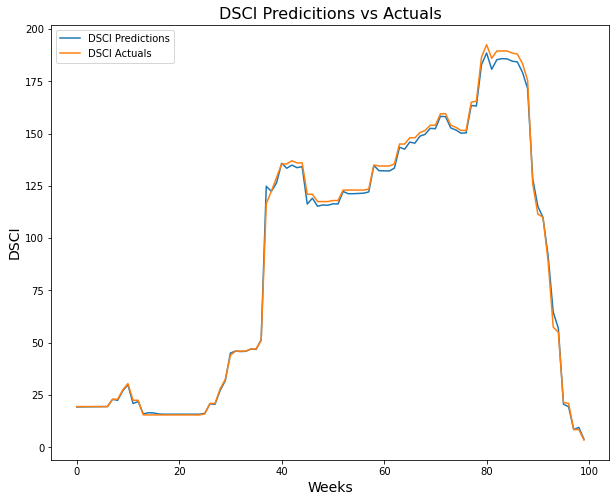

In [69]:
plot_predictions1(9, model4, X2_test, y2_test)

In [70]:
history_df = pd.DataFrame(history.history)
history_df

,loss,root_mean_squared_error,val_loss,val_root_mean_squared_error
0,40755.953125,201.881042,61827.960938,248.652283
1,32141.736328,179.281158,47435.234375,217.796310
2,22234.884766,149.113663,32894.015625,181.367081
3,13244.500000,115.084755,19662.082031,140.221542
4,6715.806152,81.950020,10689.597656,103.390511
5,3398.997070,58.300919,5995.518555,77.430733
6,1904.423706,43.639702,3629.929688,60.248898
7,1171.448364,34.226429,2186.139160,46.756168
8,716.782837,26.772800,1257.954346,35.467651
9,437.870056,20.925344,713.782349,26.716705


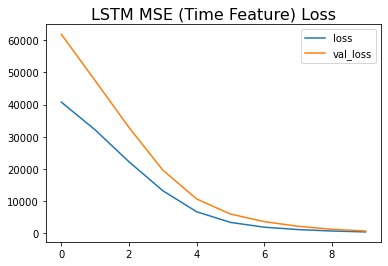

In [71]:
history_df.filter(like='loss').plot();
plt.title("LSTM MSE (Time Feature) Loss", fontsize=16)
plt.savefig('fig10.png')

In [72]:
tmax_dsci_df = pd.concat([west['avg_tmax'], dsci_df], axis=1)

In [73]:
prcp_dsci_df = pd.concat([west['total_avg_prcp_inches'], dsci_df], axis=1)

In [74]:
tmax_dsci_df.head()

,avg_tmax,DSCI,year sin,year cos
ValidEnd,,,,
2001-01-01,55.340909,0.0,0.008300,0.999966
2001-01-08,56.907792,15.5,0.128365,0.991727
2001-01-15,45.813312,29.5,0.246570,0.969125
2001-01-22,47.125649,15.0,0.361204,0.932487
2001-01-29,46.303571,28.5,0.470607,0.882343


In [75]:
prcp_dsci_df.head()

,total_avg_prcp_inches,DSCI,year sin,year cos
ValidEnd,,,,
2001-01-01,0.000000,0.0,0.008300,0.999966
2001-01-08,0.573636,15.5,0.128365,0.991727
2001-01-15,1.895909,29.5,0.246570,0.969125
2001-01-22,0.072500,15.0,0.361204,0.932487
2001-01-29,1.511818,28.5,0.470607,0.882343


In [76]:
def df_to_X_y3(df, windowsize=7):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-windowsize):
        row = [r for r in df_as_np[i:i+windowsize]]
        X.append(row)
        label = df_as_np[i+windowsize][0], df_as_np[i+windowsize][1]
        y.append(label)
    return np.array(X), np.array(y)

In [77]:
X3, y3 = df_to_X_y3(prcp_dsci_df)
X3.shape, y3.shape

((1037, 7, 4), (1037, 2))

In [78]:
X3_train, y3_train = X3[:750], y3[:750]
X3_val, y3_val = X3[750:850], y3[750:850]
X3_test, y3_test = X3[850:], y3[850:]

In [79]:
#Standardizing for Preprocessing. Followed video instructions, but could try a MinMax scaler next time
prcp_training_mean3 = np.mean(X3_train[:, :, 0])
prcp_training_std3 = np.mean(X3_train[:, :, 0])

dsci_training_mean3 = np.mean(X3_train[:, :, 1])
dsci_training_sd3 = np.std(X3_train[:, :, 1])

def preprocess3(X):
    X[:, :, 0] = (X[:, :, 0] - prcp_training_mean3/prcp_training_std3)
    X[:, :, 1] = (X[:, :,1] - dsci_training_mean3/dsci_training_sd3)
    return X
def preprocess_out(X):
    X[:, 0] = (X[:, 0] - prcp_training_mean3/prcp_training_std3)
    X[:, 1] = (X[:,1] - dsci_training_mean3/dsci_training_sd3)
    return X



In [80]:
preprocess3(X3_train)
preprocess3(X3_val)
preprocess3(X3_test)

array([[[-3.33333333e-02,  1.79432586e+01,  9.65598082e-01,
         -2.60039120e-01],
        [-2.27500000e-01,  1.79432586e+01,  9.27367405e-01,
         -3.74151970e-01],
        [-7.27500000e-01,  1.79432586e+01,  8.75705362e-01,
         -4.82845853e-01],
        ...,
        [-7.60000000e-01,  1.79432586e+01,  7.35263828e-01,
         -6.77781014e-01],
        [-7.49166667e-01,  1.79432586e+01,  6.48518397e-01,
         -7.61198981e-01],
        [-9.82500000e-01,  1.79432586e+01,  5.52380262e-01,
         -8.33592254e-01]],

       [[-2.27500000e-01,  1.79432586e+01,  9.27367405e-01,
         -3.74151970e-01],
        [-7.27500000e-01,  1.79432586e+01,  8.75705362e-01,
         -4.82845853e-01],
        [-5.22500000e-01,  1.79432586e+01,  8.11360193e-01,
         -5.84546523e-01],
        ...,
        [-7.49166667e-01,  1.79432586e+01,  6.48518397e-01,
         -7.61198981e-01],
        [-9.82500000e-01,  1.79432586e+01,  5.52380262e-01,
         -8.33592254e-01],
        [-9.650

In [81]:
preprocess_out(X3_train)
preprocess_out(X3_val)
preprocess_out(X3_test)

array([[[-1.03333333e+00,  1.69432586e+01, -3.44019180e-02,
         -1.26003912e+00],
        [-1.78424143e+00,  1.63865171e+01, -6.29374023e-01,
         -1.93089340e+00],
        [-7.27500000e-01,  1.79432586e+01,  8.75705362e-01,
         -4.82845853e-01],
        ...,
        [-7.60000000e-01,  1.79432586e+01,  7.35263828e-01,
         -6.77781014e-01],
        [-7.49166667e-01,  1.79432586e+01,  6.48518397e-01,
         -7.61198981e-01],
        [-9.82500000e-01,  1.79432586e+01,  5.52380262e-01,
         -8.33592254e-01]],

       [[-1.22750000e+00,  1.69432586e+01, -7.26325951e-02,
         -1.37415197e+00],
        [-2.28424143e+00,  1.63865171e+01, -6.81036065e-01,
         -2.03958728e+00],
        [-5.22500000e-01,  1.79432586e+01,  8.11360193e-01,
         -5.84546523e-01],
        ...,
        [-7.49166667e-01,  1.79432586e+01,  6.48518397e-01,
         -7.61198981e-01],
        [-9.82500000e-01,  1.79432586e+01,  5.52380262e-01,
         -8.33592254e-01],
        [-9.650

In [82]:
model5 = Sequential()
model5.add(InputLayer((7,4)))
model5.add(LSTM(64))
model5.add(Dense(8, 'relu'))
model5.add(Dense(2, 'linear'))
model5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 64)                17664     
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 18        
Total params: 18,202
Trainable params: 18,202
Non-trainable params: 0
_________________________________________________________________


In [83]:
cp5 = ModelCheckpoint('model5/', save_best_only=True)
model5.compile(loss=MeanSquaredError(), optimizer = Adam(learning_rate=0.005), metrics=[RootMeanSquaredError()])

In [84]:
history = (model5.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp5]))

Epoch 1/10
24/24 [==============================] - 11s 113ms/step - loss: 21340.4668 - root_mean_squared_error: 146.0838 - val_loss: 31933.9395 - val_root_mean_squared_error: 178.7007


INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


Epoch 2/10
24/24 [==============================] - 0s 13ms/step - loss: 18592.6914 - root_mean_squared_error: 136.3550 - val_loss: 26878.1484 - val_root_mean_squared_error: 163.9456


INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


Epoch 3/10
24/24 [==============================] - 0s 20ms/step - loss: 14286.3174 - root_mean_squared_error: 119.5254 - val_loss: 20046.1387 - val_root_mean_squared_error: 141.5844


INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


Epoch 4/10
24/24 [==============================] - 1s 22ms/step - loss: 9350.6699 - root_mean_squared_error: 96.6989 - val_loss: 12845.2822 - val_root_mean_squared_error: 113.3370


INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


Epoch 5/10
24/24 [==============================] - 0s 16ms/step - loss: 5157.4888 - root_mean_squared_error: 71.8157 - val_loss: 7283.2495 - val_root_mean_squared_error: 85.3419


INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


Epoch 6/10
24/24 [==============================] - 0s 10ms/step - loss: 2580.1189 - root_mean_squared_error: 50.7949 - val_loss: 4090.9385 - val_root_mean_squared_error: 63.9604


INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


Epoch 7/10
24/24 [==============================] - 1s 24ms/step - loss: 1427.8463 - root_mean_squared_error: 37.7869 - val_loss: 2408.7688 - val_root_mean_squared_error: 49.0792


INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


Epoch 8/10
24/24 [==============================] - 0s 10ms/step - loss: 864.0034 - root_mean_squared_error: 29.3939 - val_loss: 1488.1753 - val_root_mean_squared_error: 38.5769


INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


Epoch 9/10
24/24 [==============================] - 0s 10ms/step - loss: 552.9808 - root_mean_squared_error: 23.5155 - val_loss: 910.1055 - val_root_mean_squared_error: 30.1680


INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


Epoch 10/10
24/24 [==============================] - 1s 27ms/step - loss: 361.7173 - root_mean_squared_error: 19.0189 - val_loss: 551.8815 - val_root_mean_squared_error: 23.4922


INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


In [85]:
def plot_predictions2(fignum, model, X, y, start=0, end = 100):
    predictions = model.predict(X)
    prcp_preds, dsci_preds = predictions[:, 0], predictions[:, 1]
    prcp_actuals, dsci_actuals = y[:, 0], y[:, 1]
    df = pd.DataFrame(data= {
        'Precipitation Predictions': prcp_preds, 
        'Precipitation Actuals': prcp_actuals,
        'DSCI Pred': dsci_preds,
        'DSCI Actuals': dsci_actuals
        })
    plt.plot(df['Precipitation Predictions'][start:end], label='Precipitation Pred')
    plt.plot(df['Precipitation Actuals'][start:end], label='Precipitation Actual')
    plt.plot(df['DSCI Pred'][start:end], label = 'DSCI Predictions')
    plt.plot(df['DSCI Actuals'][start:end], label = 'DSCI Actuals')
    plt.legend(loc= 'upper left')
    plt.savefig(f'fig{fignum}.png')

    return df[start:end]


,Precipitation Predictions,Precipitation Actuals,DSCI Pred,DSCI Actuals
0,0.459759,0.035000,15.254169,19.5
1,0.466109,0.749167,16.143427,19.5
2,0.521639,0.023333,13.648584,19.5
3,0.461301,0.010000,17.247097,19.5
4,0.460573,0.005000,18.355185,19.5
...,...,...,...,...
95,0.317263,0.760000,8.957705,8.5
96,0.477157,1.267500,3.458208,8.5
97,0.487586,0.435000,3.921844,3.5
98,0.499943,0.490000,2.861746,3.0


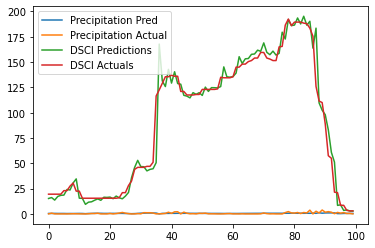

In [86]:
plot_predictions2(11, model5, X3_test, y3_test)

In [87]:
def postprocess_dsci(arr):
    arr = (arr*dsci_training_sd3) + dsci_training_mean3
    return arr

def postprocess_prcp(arr):
    arr = (arr*prcp_training_std3) + prcp_training_mean3
    return arr

In [88]:
def plot_predictions2(fignum, model, X, y, start=0, end = 100):
    predictions = model.predict(X)
    prcp_preds, dsci_preds = postprocess_prcp(predictions[:, 0]), postprocess_dsci(predictions[:, 1])
    prcp_actuals, dsci_actuals = postprocess_prcp(y[:, 0]), postprocess_dsci(y[:, 1])
    df = pd.DataFrame(data= {
        'Precipitation Predictions': prcp_preds, 
        'Precipitation Actuals': prcp_actuals,
        'DSCI Pred': dsci_preds,
        'DSCI Actuals': dsci_actuals
        })
    plt.plot(df['Precipitation Predictions'][start:end])
    plt.plot(df['Precipitation Actuals'][start:end])
    plt.plot(df['DSCI Pred'][start:end])
    plt.plot(df['DSCI Actuals'][start:end])
    plt.savefig(f'fig{str(fignum)}.png')
    return df[start:end]

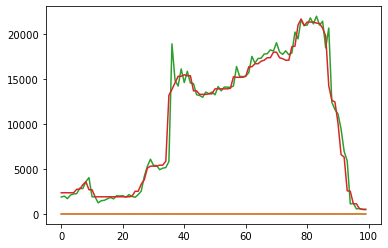

In [89]:
post_processed_df = plot_predictions2(12, model5, X3_test, y3_test)

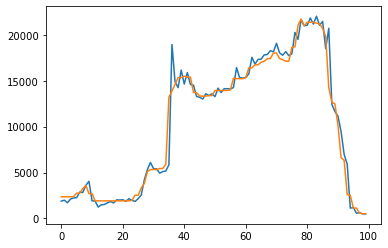

In [90]:
start, end = 0, 100
plt.plot(post_processed_df['DSCI Pred'][start: end])
plt.plot(post_processed_df['DSCI Actuals'][start: end])

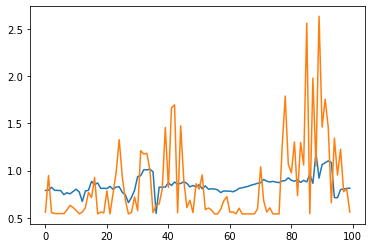

In [91]:
start, end = 0, 100
plt.plot(post_processed_df['Precipitation Predictions'][start: end])
plt.plot(post_processed_df['Precipitation Actuals'][start: end])

In [92]:
history_df = pd.DataFrame(history.history)
history_df

,loss,root_mean_squared_error,val_loss,val_root_mean_squared_error
0,21340.466797,146.083771,31933.939453,178.700699
1,18592.691406,136.355026,26878.148438,163.945572
2,14286.317383,119.525375,20046.138672,141.584381
3,9350.669922,96.698860,12845.282227,113.337029
4,5157.488770,71.815659,7283.249512,85.341949
5,2580.118896,50.794872,4090.938477,63.960445
6,1427.846313,37.786854,2408.768799,49.079208
7,864.003357,29.393932,1488.175293,38.576874
8,552.980774,23.515543,910.105530,30.167953
9,361.717255,19.018867,551.881531,23.492159


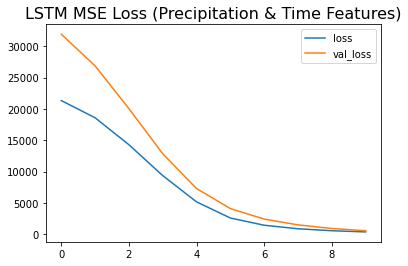

In [93]:
history_df.filter(like='loss').plot();
plt.title("LSTM MSE Loss (Precipitation & Time Features)", fontsize=16)
plt.savefig('fig13.png')

In [94]:
X4, y4 = df_to_X_y3(tmax_dsci_df)
X4.shape, y4.shape

((1037, 7, 4), (1037, 2))

In [95]:
X4_train, y4_train = X4[:750], y4[:750]
X4_val, y4_val = X4[750:850], y4[750:850]
X4_test, y4_test = X4[850:], y4[850:]

In [96]:
preprocess3(X4_train)
preprocess3(X4_val)
preprocess3(X4_test)

array([[[ 6.48452381e+01,  1.79432586e+01,  9.65598082e-01,
         -2.60039120e-01],
        [ 6.68095238e+01,  1.79432586e+01,  9.27367405e-01,
         -3.74151970e-01],
        [ 6.71130952e+01,  1.79432586e+01,  8.75705362e-01,
         -4.82845853e-01],
        ...,
        [ 7.00535714e+01,  1.79432586e+01,  7.35263828e-01,
         -6.77781014e-01],
        [ 7.27797619e+01,  1.79432586e+01,  6.48518397e-01,
         -7.61198981e-01],
        [ 7.89464286e+01,  1.79432586e+01,  5.52380262e-01,
         -8.33592254e-01]],

       [[ 6.68095238e+01,  1.79432586e+01,  9.27367405e-01,
         -3.74151970e-01],
        [ 6.71130952e+01,  1.79432586e+01,  8.75705362e-01,
         -4.82845853e-01],
        [ 7.46130952e+01,  1.79432586e+01,  8.11360193e-01,
         -5.84546523e-01],
        ...,
        [ 7.27797619e+01,  1.79432586e+01,  6.48518397e-01,
         -7.61198981e-01],
        [ 7.89464286e+01,  1.79432586e+01,  5.52380262e-01,
         -8.33592254e-01],
        [ 8.205

In [97]:
preprocess_out(X4_train)
preprocess_out(X4_val)
preprocess_out(X4_test)

array([[[ 6.38452381e+01,  1.69432586e+01, -3.44019180e-02,
         -1.26003912e+00],
        [ 6.52527824e+01,  1.63865171e+01, -6.29374023e-01,
         -1.93089340e+00],
        [ 6.71130952e+01,  1.79432586e+01,  8.75705362e-01,
         -4.82845853e-01],
        ...,
        [ 7.00535714e+01,  1.79432586e+01,  7.35263828e-01,
         -6.77781014e-01],
        [ 7.27797619e+01,  1.79432586e+01,  6.48518397e-01,
         -7.61198981e-01],
        [ 7.89464286e+01,  1.79432586e+01,  5.52380262e-01,
         -8.33592254e-01]],

       [[ 6.58095238e+01,  1.69432586e+01, -7.26325951e-02,
         -1.37415197e+00],
        [ 6.55563538e+01,  1.63865171e+01, -6.81036065e-01,
         -2.03958728e+00],
        [ 7.46130952e+01,  1.79432586e+01,  8.11360193e-01,
         -5.84546523e-01],
        ...,
        [ 7.27797619e+01,  1.79432586e+01,  6.48518397e-01,
         -7.61198981e-01],
        [ 7.89464286e+01,  1.79432586e+01,  5.52380262e-01,
         -8.33592254e-01],
        [ 8.205

In [98]:
model6 = Sequential()
model6.add(InputLayer((7,4)))
model6.add(LSTM(64))
model6.add(Dense(8, 'relu'))
model6.add(Dense(2, 'linear'))
model6.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 64)                17664     
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 18        
Total params: 18,202
Trainable params: 18,202
Non-trainable params: 0
_________________________________________________________________


In [99]:
cp6 = ModelCheckpoint('model6/', save_best_only=True)
model6.compile(loss=MeanSquaredError(), optimizer = Adam(learning_rate=0.005), metrics=[RootMeanSquaredError()])

In [100]:
history = (model6.fit(X4_train, y4_train, validation_data=(X4_val, y4_val), epochs=10, callbacks=[cp6]))

Epoch 1/10
24/24 [==============================] - 3s 36ms/step - loss: 23830.6367 - root_mean_squared_error: 154.3717 - val_loss: 34991.1406 - val_root_mean_squared_error: 187.0592


INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


Epoch 2/10
24/24 [==============================] - 0s 10ms/step - loss: 21834.5195 - root_mean_squared_error: 147.7651 - val_loss: 30714.8359 - val_root_mean_squared_error: 175.2565


INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


Epoch 3/10
24/24 [==============================] - 0s 14ms/step - loss: 16943.9062 - root_mean_squared_error: 130.1688 - val_loss: 22680.1895 - val_root_mean_squared_error: 150.5994


INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


Epoch 4/10
24/24 [==============================] - 0s 10ms/step - loss: 11150.1240 - root_mean_squared_error: 105.5941 - val_loss: 15046.7217 - val_root_mean_squared_error: 122.6651


INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


Epoch 5/10
24/24 [==============================] - 0s 14ms/step - loss: 6695.4312 - root_mean_squared_error: 81.8256 - val_loss: 9251.3184 - val_root_mean_squared_error: 96.1838


INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


Epoch 6/10
24/24 [==============================] - 0s 11ms/step - loss: 3790.9587 - root_mean_squared_error: 61.5708 - val_loss: 5557.5049 - val_root_mean_squared_error: 74.5487


INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


Epoch 7/10
24/24 [==============================] - 0s 15ms/step - loss: 2217.8989 - root_mean_squared_error: 47.0946 - val_loss: 3417.8752 - val_root_mean_squared_error: 58.4626


INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


Epoch 8/10
24/24 [==============================] - 0s 12ms/step - loss: 1403.0916 - root_mean_squared_error: 37.4579 - val_loss: 2153.3484 - val_root_mean_squared_error: 46.4042


INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


Epoch 9/10
24/24 [==============================] - 0s 19ms/step - loss: 925.8687 - root_mean_squared_error: 30.4281 - val_loss: 1443.1400 - val_root_mean_squared_error: 37.9887


INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


Epoch 10/10
24/24 [==============================] - 0s 10ms/step - loss: 632.9952 - root_mean_squared_error: 25.1594 - val_loss: 1007.0449 - val_root_mean_squared_error: 31.7340


INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


In [101]:
def plot_predictions3(fignum, model, X, y, start=0, end = 100):
    predictions = model.predict(X)
    temp_preds, dsci_preds = predictions[:, 0], predictions[:, 1]
    temp_actuals, dsci_actuals = y[:, 0], y[:, 1]
    df = pd.DataFrame(data= {
        'High Temperature Predictions': temp_preds, 
        'High Temperature Actuals': temp_actuals,
        'DSCI Pred': dsci_preds,
        'DSCI Actuals': dsci_actuals
        })
    plt.figure(figsize = (10,8))
    plt.plot(df['High Temperature Predictions'][start:end], label='High Temperature Predictions')
    plt.plot(df['High Temperature Actuals'][start:end], label='High Temperature Actuals')
    plt.plot(df['DSCI Pred'][start:end], label = 'DSCI Predictions')
    plt.plot(df['DSCI Actuals'][start:end], label = 'DSCI Actuals')
    plt.legend(loc= 'upper left')
    
    plt.savefig(f'fig{fignum}.png')

    return df[start:end]

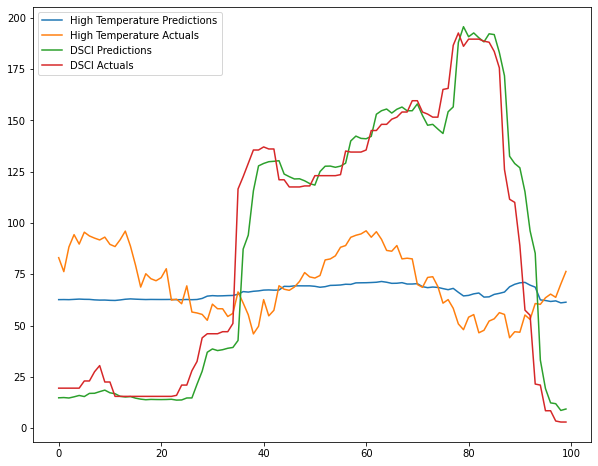

In [102]:
post_processed_df2 = plot_predictions3(16, model6, X4_test, y4_test)

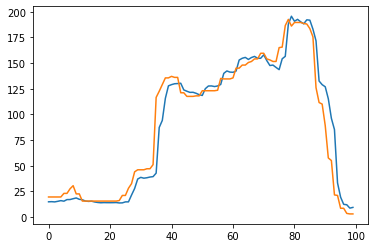

In [103]:
start, end = 0, 100
plt.plot(post_processed_df2['DSCI Pred'][start: end])
plt.plot(post_processed_df2['DSCI Actuals'][start: end])
plt.savefig('fig15.png')

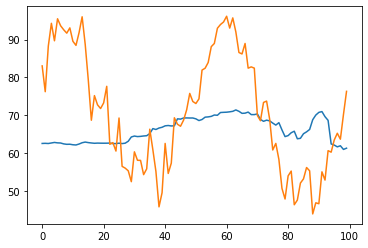

In [104]:
start, end = 0, 100
plt.plot(post_processed_df2['High Temperature Predictions'][start: end])
plt.plot(post_processed_df2['High Temperature Actuals'][start: end])

In [105]:
history_df = pd.DataFrame(history.history)
history_df

,loss,root_mean_squared_error,val_loss,val_root_mean_squared_error
0,23830.636719,154.371750,34991.140625,187.059189
1,21834.519531,147.765076,30714.835938,175.256485
2,16943.906250,130.168762,22680.189453,150.599426
3,11150.124023,105.594147,15046.721680,122.665077
4,6695.431152,81.825615,9251.318359,96.183777
5,3790.958740,61.570763,5557.504883,74.548676
6,2217.898926,47.094574,3417.875244,58.462597
7,1403.091553,37.457863,2153.348389,46.404186
8,925.868652,30.428089,1443.140015,37.988682
9,632.995178,25.159395,1007.044861,31.733971


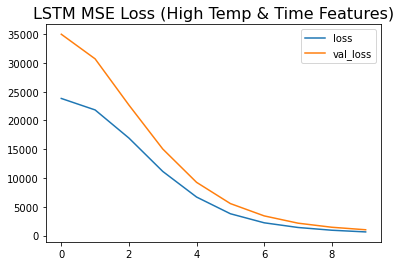

In [106]:
history_df.filter(like='loss').plot();
plt.title("LSTM MSE Loss (High Temp & Time Features)", fontsize=16)
plt.savefig('fig17.png')

#### Model Summary

Model|MSE|Val Loss|RMSE|
|---|---|---|---|
|LSTM|544.09|760.45|27.57|
|CNN|138.06|123.14|11.75|
|GRU|757.87|1187.01|44.91|
|LSTM M.V.|615.95|1142.63|33.8|
|LSTM Precip.|757.87|2000.4|44.7|
|LSTM Temp|4628.32|8033.28|89.62|